# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
api_key = weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count=len(cities)
city_count

605

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
params1 = {"appid": api_key, "units": units, "q": city }

In [4]:
#Test

city="Irvine"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response1 = requests.get(query_url + city).json()
print(query_url + city)


response2 = requests.get(url, params=params1).json()
#print(response2.url)


name_test=response2["name"]
id_test= response2["id"]

print(json.dumps([response2], indent=2))

print("Id==========", id_test)

http://api.openweathermap.org/data/2.5/weather?appid=f1896ef9774eec1e5c2ba62805c4b461&units=metric&q=Irvine
[
  {
    "coord": {
      "lon": -34.8339,
      "lat": -6.9811
    },
    "weather": [
      {
        "id": 804,
        "main": "Clouds",
        "description": "overcast clouds",
        "icon": "04n"
      }
    ],
    "base": "stations",
    "main": {
      "temp": 27.37,
      "feels_like": 30.02,
      "temp_min": 27.37,
      "temp_max": 27.37,
      "pressure": 1011,
      "humidity": 75,
      "sea_level": 1011,
      "grnd_level": 1010
    },
    "visibility": 10000,
    "wind": {
      "speed": 6.87,
      "deg": 152,
      "gust": 8.99
    },
    "clouds": {
      "all": 100
    },
    "dt": 1651350334,
    "sys": {
      "type": 1,
      "id": 8391,
      "country": "BR",
      "sunrise": 1651306824,
      "sunset": 1651349550
    },
    "timezone": -10800,
    "id": 3404558,
    "name": "Cabedelo",
    "cod": 200
  }
]
Id========== 3404558


In [5]:
#test 2
name_test=response2["name"]
id_test= response2["id"]
#print("Id==========", id_test)

 #Main main": {
#      "temp": 18.19,
#      "feels_like": 17.55,
#      "temp_min": 15.75,
#      "temp_max": 21.48,
#      "pressure": 1017,
#      "humidity": 57
lon_test = response2["coord"]["lon"]
lat_test = response2["coord"]["lat"]
print(lat_test)

temp = response2["main"]["temp_max"]
humidity_test = response2["main"]["humidity"]
cld_test = response2["clouds"]["all"]
print("cld", cld_test)
wind_speed = response2["wind"]["speed"]
country = response2 ["sys"]["country"]

date_test = response2["dt"]
print(date_test)

-6.9811
cld 100
1651350334


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
lat = []
lng = []
max_temp = []
cloudiness = []
wind_speed = []
country = []
date = []
humidity = []
city_name = []

In [7]:
# Loop through the list of cities and perform a request for data on each
#params = {"appid": api_key, "units": units, "q": city }
C=1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print( "Processing Record", C, "of", city_count, "City Name: ", city )
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        city_name.append(response["name"])
    except: 
        print("City not found. Skipping...")
    C=C+1
#print(lat)

Processing Record 1 of 605 City Name:  hermanus
Processing Record 2 of 605 City Name:  taolanaro
City not found. Skipping...
Processing Record 3 of 605 City Name:  impfondo
Processing Record 4 of 605 City Name:  rikitea
Processing Record 5 of 605 City Name:  port alfred
Processing Record 6 of 605 City Name:  emba
Processing Record 7 of 605 City Name:  san patricio
Processing Record 8 of 605 City Name:  qianan
Processing Record 9 of 605 City Name:  klaksvik
Processing Record 10 of 605 City Name:  kavaratti
Processing Record 11 of 605 City Name:  punta arenas
Processing Record 12 of 605 City Name:  plouzane
Processing Record 13 of 605 City Name:  varzelandia
Processing Record 14 of 605 City Name:  aswan
Processing Record 15 of 605 City Name:  cabo san lucas
Processing Record 16 of 605 City Name:  torbay
Processing Record 17 of 605 City Name:  castro
Processing Record 18 of 605 City Name:  provideniya
Processing Record 19 of 605 City Name:  neuquen
Processing Record 20 of 605 City Name:  

Processing Record 159 of 605 City Name:  clyde river
Processing Record 160 of 605 City Name:  cape town
Processing Record 161 of 605 City Name:  mariental
Processing Record 162 of 605 City Name:  ribeira grande
Processing Record 163 of 605 City Name:  hofu
Processing Record 164 of 605 City Name:  new norfolk
Processing Record 165 of 605 City Name:  san cristobal
Processing Record 166 of 605 City Name:  shakawe
Processing Record 167 of 605 City Name:  bathurst
Processing Record 168 of 605 City Name:  laredo
Processing Record 169 of 605 City Name:  norman wells
Processing Record 170 of 605 City Name:  trincomalee
Processing Record 171 of 605 City Name:  mabaruma
Processing Record 172 of 605 City Name:  buckeye
Processing Record 173 of 605 City Name:  yulara
Processing Record 174 of 605 City Name:  ponta delgada
Processing Record 175 of 605 City Name:  nelson bay
Processing Record 176 of 605 City Name:  bethel
Processing Record 177 of 605 City Name:  mao
Processing Record 178 of 605 City 

Processing Record 314 of 605 City Name:  saint-augustin
Processing Record 315 of 605 City Name:  monroe
Processing Record 316 of 605 City Name:  tura
Processing Record 317 of 605 City Name:  jiutai
Processing Record 318 of 605 City Name:  havre
Processing Record 319 of 605 City Name:  soyo
Processing Record 320 of 605 City Name:  qurbah
City not found. Skipping...
Processing Record 321 of 605 City Name:  port augusta
Processing Record 322 of 605 City Name:  faanui
Processing Record 323 of 605 City Name:  hovd
Processing Record 324 of 605 City Name:  port blair
Processing Record 325 of 605 City Name:  guarapari
Processing Record 326 of 605 City Name:  leshukonskoye
Processing Record 327 of 605 City Name:  srednekolymsk
Processing Record 328 of 605 City Name:  iralaya
Processing Record 329 of 605 City Name:  maryville
Processing Record 330 of 605 City Name:  ambon
Processing Record 331 of 605 City Name:  kaplice
Processing Record 332 of 605 City Name:  honiara
Processing Record 333 of 60

Processing Record 469 of 605 City Name:  saint-leu
Processing Record 470 of 605 City Name:  iquique
Processing Record 471 of 605 City Name:  kanniyakumari
Processing Record 472 of 605 City Name:  souillac
Processing Record 473 of 605 City Name:  beringovskiy
Processing Record 474 of 605 City Name:  menongue
Processing Record 475 of 605 City Name:  boyolangu
Processing Record 476 of 605 City Name:  mehamn
Processing Record 477 of 605 City Name:  churapcha
Processing Record 478 of 605 City Name:  khlung
Processing Record 479 of 605 City Name:  agirish
Processing Record 480 of 605 City Name:  omaruru
Processing Record 481 of 605 City Name:  san pedro
Processing Record 482 of 605 City Name:  mount pleasant
Processing Record 483 of 605 City Name:  kargopol
Processing Record 484 of 605 City Name:  gribanovskiy
Processing Record 485 of 605 City Name:  gadsden
Processing Record 486 of 605 City Name:  leningradskiy
Processing Record 487 of 605 City Name:  santa cruz de la palma
Processing Recor

In [8]:
print(len(city_name))
print(len(cities))
print(len(humidity))

557
605
557


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# creating a Data Frame
city_dic = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Max Temp": max_temp,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Humidity": humidity,
    "Lng": lng,
    "Lat": lat    
}
city_data = pd.DataFrame(city_dic)
city_data.drop_duplicates
city_data.dropna()
city_data.isnull().sum() 
city_data.count()



City          557
Country       557
Date          557
Max Temp      557
Cloudiness    557
Wind Speed    557
Humidity      557
Lng           557
Lat           557
dtype: int64

In [29]:
# export data into csv
city_data.to_csv(output_data_file, index_label="City_ID")

In [10]:
city_data.describe()

,Date,Max Temp,Cloudiness,Wind Speed,Humidity,Lng,Lat
count,5.570000e+02,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,1.651350e+09,16.434524,56.928187,3.594273,69.186715,18.171034,19.889181
std,1.429905e+02,10.995734,40.206775,2.281823,22.096933,91.809907,33.637092
min,1.651350e+09,-16.740000,0.000000,0.000000,4.000000,-179.166700,-54.800000
25%,1.651350e+09,9.410000,15.000000,1.910000,59.000000,-61.348500,-8.843200
50%,1.651350e+09,17.490000,68.000000,3.180000,75.000000,21.850000,24.800000
75%,1.651351e+09,25.810000,100.000000,4.700000,86.000000,101.795900,48.649900
max,1.651351e+09,35.780000,100.000000,16.460000,100.000000,179.316700,78.218600


In [11]:
city_data.tail()

,City,Country,Date,Max Temp,Cloudiness,Wind Speed,Humidity,Lng,Lat
552,Tamworth,GB,1651350619,14.18,100,1.66,59,-1.6959,52.6340
553,Kamaishi,JP,1651350620,7.86,100,4.82,75,141.8833,39.2667
554,Young,UY,1651350620,11.95,100,2.48,79,-57.6333,-32.6833
555,Yambio,SS,1651350621,19.56,94,2.16,87,28.3955,4.5721
556,Cabedelo,BR,1651350334,27.37,100,6.87,75,-34.8339,-6.9811


In [31]:
# Export the city data into a .csv
output_data_file = "../output_data/cities.csv"

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.

print(city_data['Humidity'].describe() ,"\n")

print("Max humidity is 100%. There are no cities that have humidity>100%")

count    557.000000
mean      69.186715
std       22.096933
min        4.000000
25%       59.000000
50%       75.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64 

Max humidity is 100%. There are no cities that have humidity>100%


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

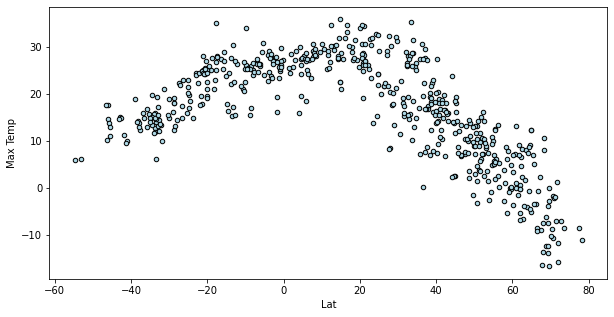

In [33]:
fig = city_data.plot.scatter(x='Lat', y='Max Temp', c='lightblue', figsize=(10,5), edgecolors='black')
plt.savefig('output_data/City Latitude vs. MaxTemp.png')

## Latitude vs. Humidity Plot

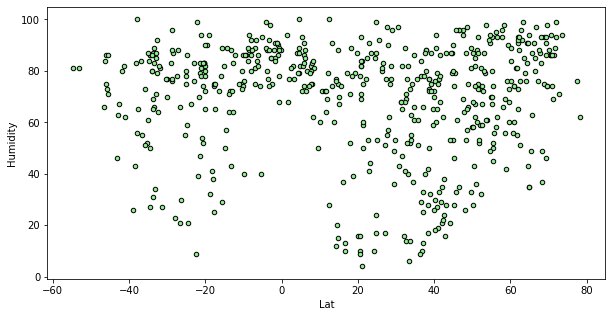

In [34]:
fig2 = city_data.plot.scatter(x='Lat', y='Humidity', c='lightgreen', figsize=(10,5), edgecolors='black')
plt.savefig('output_data/Latitude vs. Humidity.png')

## Latitude vs. Cloudiness Plot

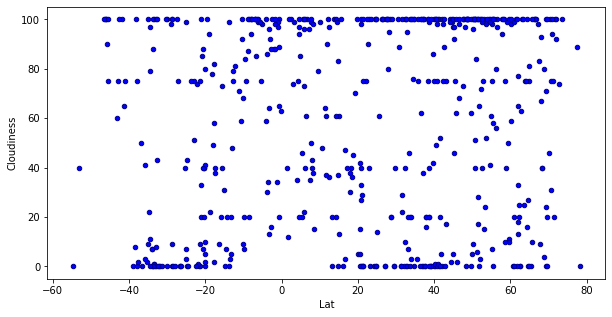

In [35]:
fig3 = city_data.plot.scatter(x='Lat', y='Cloudiness', c='blue', figsize=(10,5), edgecolors='darkblue')
plt.savefig('output_data/Latitude vs. Cloudiness.png')

## Latitude vs. Wind Speed Plot

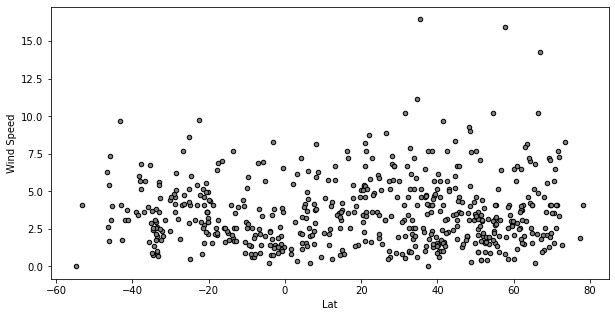

In [36]:
fig3 = city_data.plot.scatter(x='Lat', y='Wind Speed', c='gray', figsize=(10,5), edgecolors='black')
plt.savefig('output_data/Latitude vs. Wind Speed.png')

## Linear Regression

In [19]:
# New data frame for northern hemisphere
city_data_north = city_data[city_data['Lat'] >= 0]

#weather_data_north.count()

# New data frame for southern hemisphere
city_data_south = city_data[city_data['Lat'] < 0]

city_data_north.head()

,City,Country,Date,Max Temp,Cloudiness,Wind Speed,Humidity,Lng,Lat
1,Impfondo,CG,1651350335,24.32,12,0.80,68,18.0667,1.6381
4,Emba,KZ,1651350336,13.82,100,7.65,66,58.1442,48.8264
5,San Patricio,US,1651350135,30.05,95,7.33,62,-97.5169,28.0170
6,Qian’an,CN,1651350337,2.39,97,3.08,53,124.0581,44.9932
7,Klaksvík,FO,1651350203,6.51,25,3.77,88,-6.5890,62.2266


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

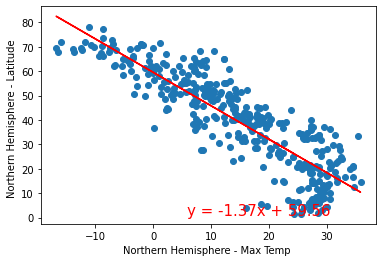

In [20]:
cdn_x_values = city_data_north['Max Temp']
cdn_y_values = city_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cdn_x_values, cdn_y_values)
regress_values = cdn_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cdn_x_values,cdn_y_values)
plt.plot(cdn_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere - Max Temp ')
plt.ylabel('Northern Hemisphere - Latitude  ')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

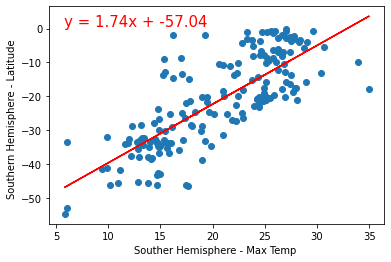

In [21]:
cds_x_values = city_data_south['Max Temp']
cds_y_values = city_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cds_x_values, cds_y_values)
regress_values = cds_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cds_x_values,cds_y_values)
plt.plot(cds_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Souther Hemisphere - Max Temp ')
plt.ylabel('Southern Hemisphere - Latitude  ')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

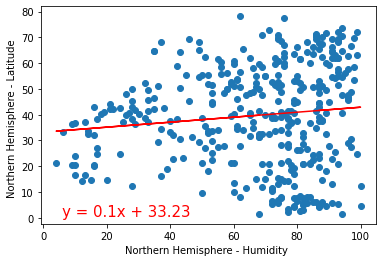

In [22]:
hln_x_values = city_data_north['Humidity']
hln_y_values = city_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(hln_x_values, hln_y_values)
regress_values = hln_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(hln_x_values,hln_y_values)
plt.plot(hln_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere - Humidity ')
plt.ylabel('Northern Hemisphere - Latitude  ')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

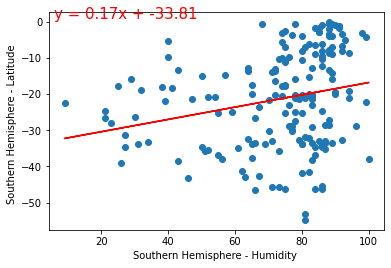

In [23]:
hls_x_values = city_data_south['Humidity']
hls_y_values = city_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(hls_x_values, hls_y_values)
regress_values = hls_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(hls_x_values, hls_y_values)
plt.plot(hls_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere - Humidity ')
plt.ylabel('Southern Hemisphere - Latitude  ')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

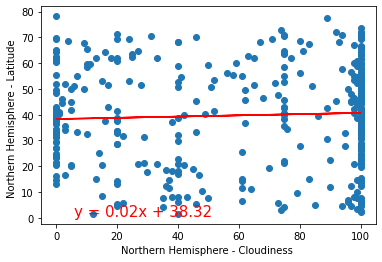

In [24]:
cln_x_values = city_data_north['Cloudiness']
cln_y_values = city_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cln_x_values, cln_y_values)
regress_values = cln_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cln_x_values,cln_y_values)
plt.plot(cln_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere - Cloudiness ')
plt.ylabel('Northern Hemisphere - Latitude  ')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

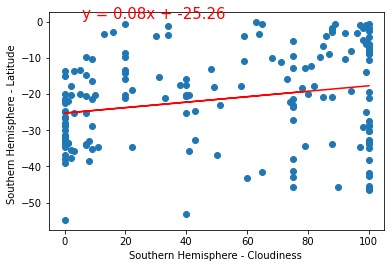

In [25]:
sln_x_values = city_data_south['Cloudiness']
sln_y_values = city_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sln_x_values, sln_y_values)
regress_values = sln_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sln_x_values, sln_y_values)
plt.plot(sln_x_values, regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere - Cloudiness ')
plt.ylabel('Southern Hemisphere - Latitude  ')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

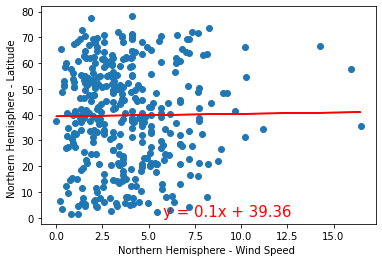

In [26]:
wln_x_values = city_data_north['Wind Speed']
wln_y_values = city_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(wln_x_values, wln_y_values)
regress_values = wln_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(wln_x_values, wln_y_values)
plt.plot(wln_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere - Wind Speed ')
plt.ylabel('Northern Hemisphere - Latitude  ')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

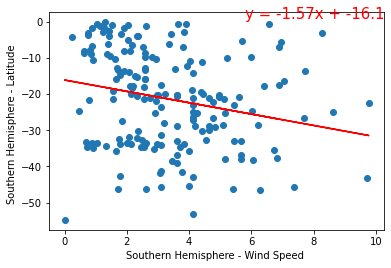

In [27]:
wls_x_values = city_data_south['Wind Speed']
wls_y_values = city_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(wls_x_values, wls_y_values)
regress_values = wls_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(wls_x_values, wls_y_values)
plt.plot(wls_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere - Wind Speed ')
plt.ylabel('Southern Hemisphere - Latitude  ')
plt.show()